<a href="https://colab.research.google.com/github/JV-Machado/Customer_churn_prediction/blob/master/Bank_Customer_Churn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/Data Science Projects/Bank Customer Churn/bank_customer_churn_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Data Science Projects/Bank Customer Churn/data')

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Bank Customer Churn/data/Bank Customer Churn Prediction.csv')

# Explorando o Dataset

In [167]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [169]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [170]:
df.duplicated().any()

False

In [171]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [172]:
object_columns = df.select_dtypes(exclude='number').columns
object_columns

Index(['country', 'gender'], dtype='object')

# Preparação dos dados e treinamento

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

In [174]:
for col in object_columns:
  df[col] = pd.factorize(df[col])[0]

In [175]:
X = df.drop(columns=['customer_id','churn'])
Y = df['churn']

In [176]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data, y_data = sm.fit_resample(X,Y)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [177]:
def classifier(model, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)
    display.plot()

**Treinamento para dados normalizados**

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [179]:
columns_to_normalize = ['credit_score','age','tenure','balance','products_number', 'estimated_salary']
columns_to_normalize

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'estimated_salary']

In [180]:
mms = MinMaxScaler()
train_df_normalized = mms.fit_transform(x_train[columns_to_normalize])
test_df_normalized = mms.transform(x_test[columns_to_normalize])

In [181]:
for i,column in enumerate(columns_to_normalize):
  x_train[column] = train_df_normalized[:, i]
  x_test[column] = test_df_normalized[:, i]

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



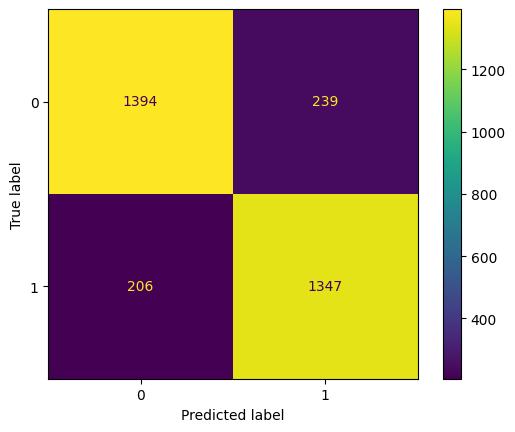

In [182]:
classifier(RandomForestClassifier(),x_train, x_test, y_train, y_test)

**Treinamento para dados padronizados**

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [184]:
columns_to_standardize = ['credit_score','age','tenure','balance','products_number', 'estimated_salary']
columns_to_standardize

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'estimated_salary']

In [185]:
ss = StandardScaler()
train_df_standardize = ss.fit_transform(x_train[columns_to_standardize])
test_df_standardize = ss.fit_transform(x_test[columns_to_standardize])

In [186]:
for i,column in enumerate(columns_to_standardize):
  x_train[column] = train_df_standardize[:, i]
  x_test[column] = test_df_standardize[:, i]

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



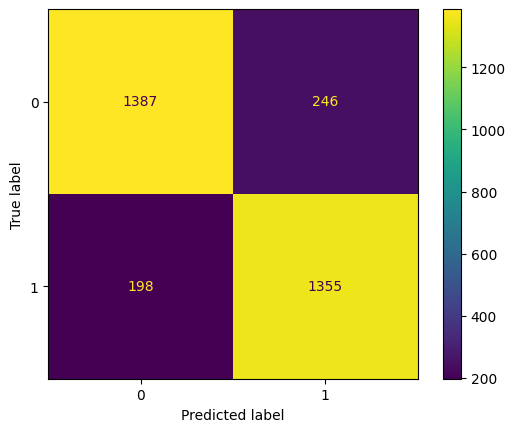

In [187]:
classifier(RandomForestClassifier(),x_train, x_test, y_train, y_test)